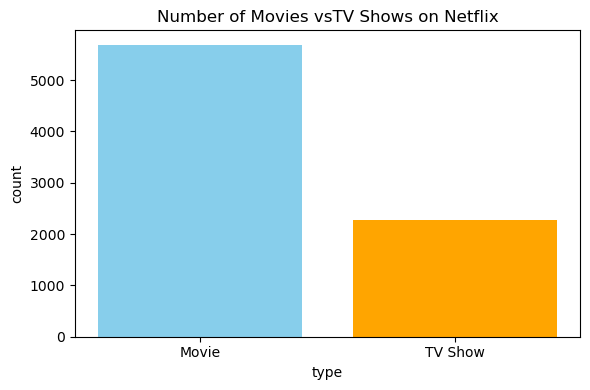

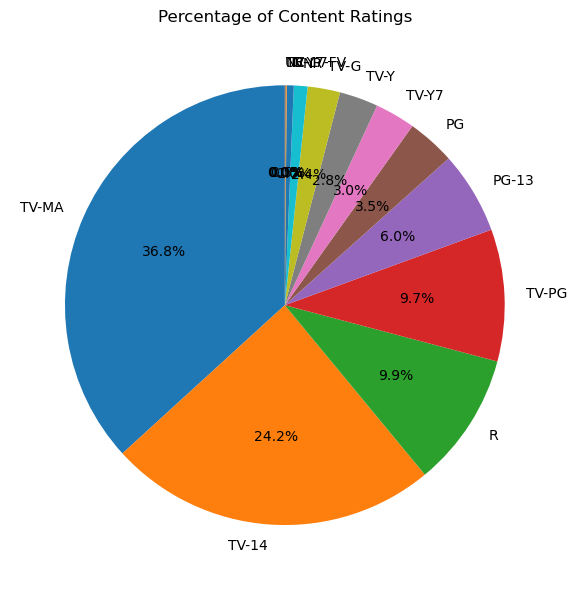

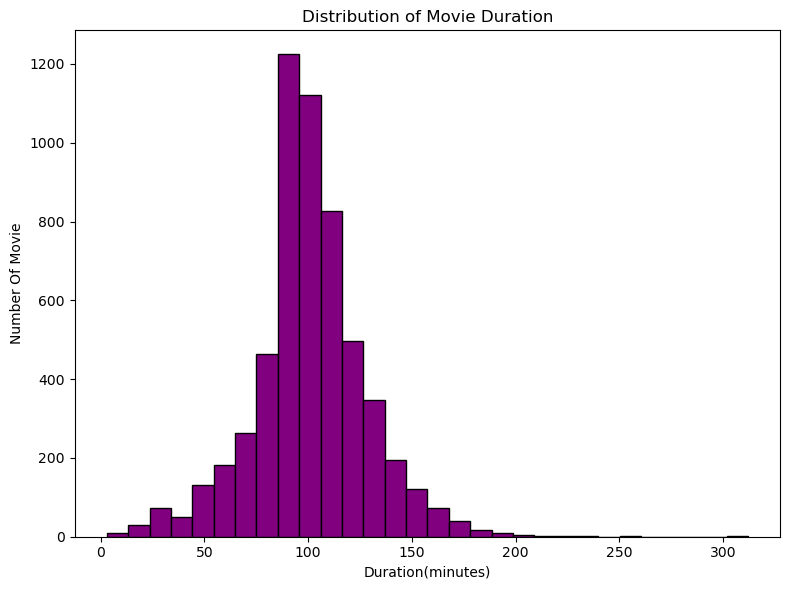

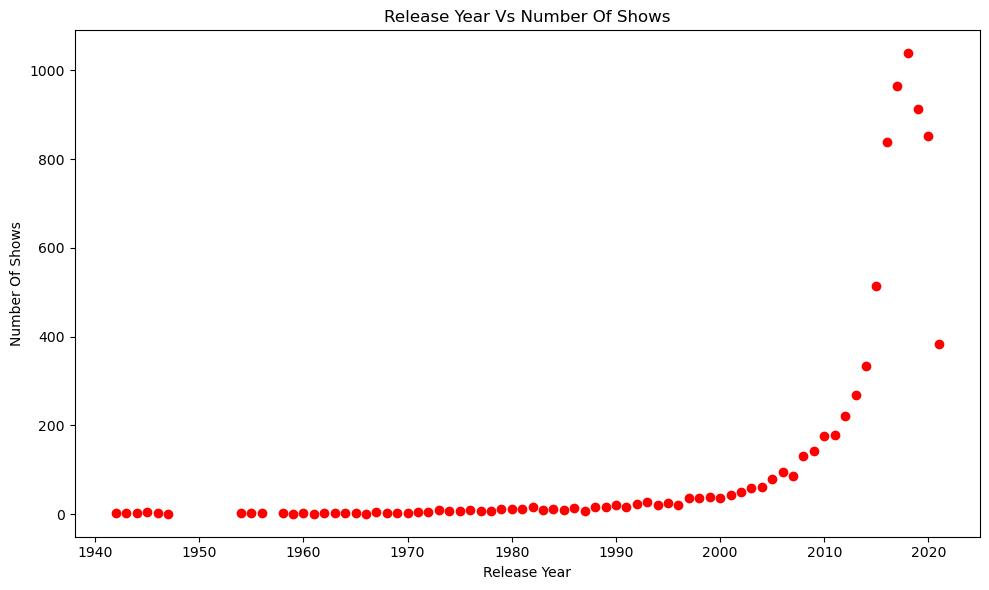

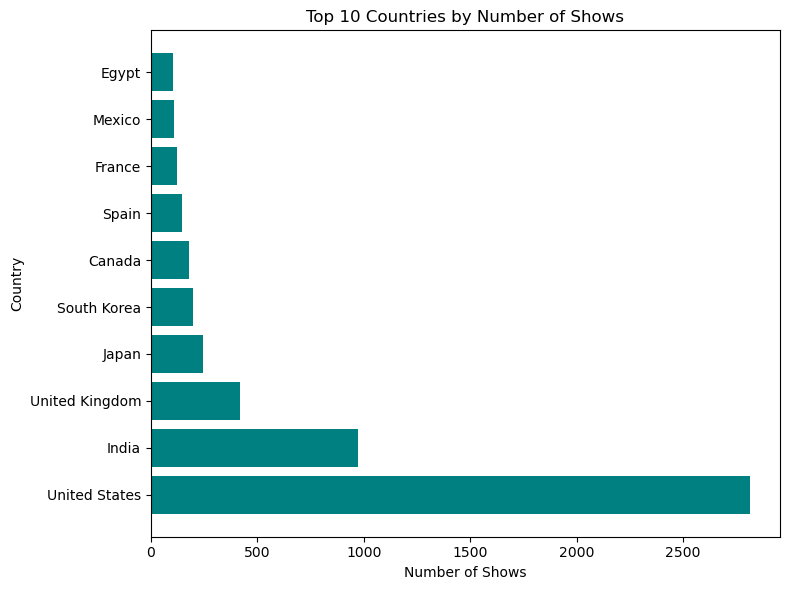

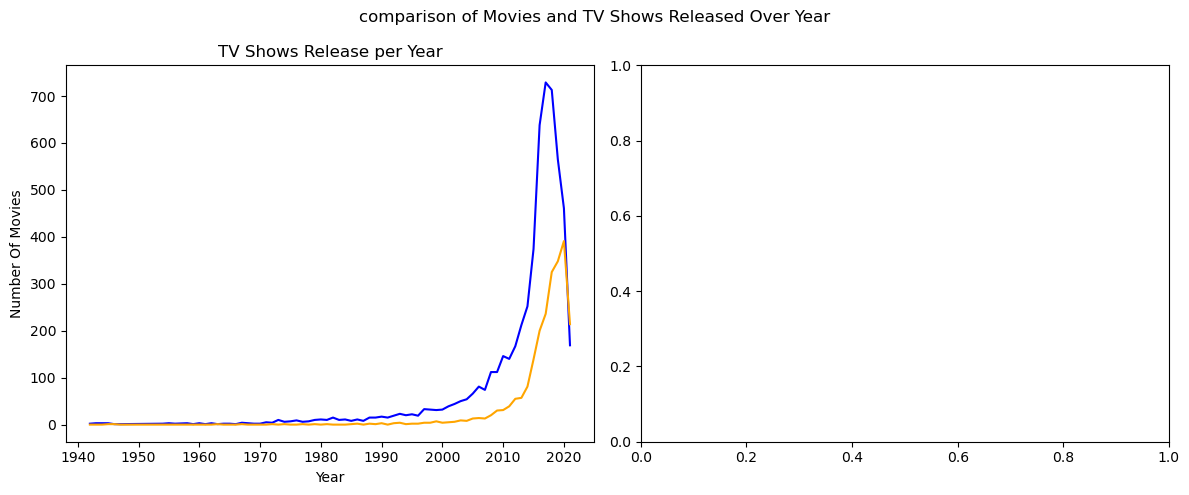

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('Netflix Data.csv')
df=df.dropna(subset=['type','release_year','rating','country','duration'])
type_counts=df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index,type_counts.values,color=['skyblue','orange'])
plt.title('Number of Movies vsTV Shows on Netflix')
plt.xlabel('type')
plt.ylabel('count')
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')
plt.show()

rating_counts=df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts, labels=rating_counts.index , autopct='%1.1f%%',startangle=90)
plt.title('Percentage of Content Ratings')
plt.tight_layout()
plt.savefig('Contents Rating.png')
plt.show()

movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace('min','').astype(int)
plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'], bins=30,color='purple',edgecolor='black')
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration(minutes)')
plt.ylabel('Number Of Movie')
plt.tight_layout()
plt.savefig('movie_duration_hist.png')
plt.show()

release_counts=df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index,release_counts.values, color='red')
plt.title('Release Year Vs Number Of Shows')
plt.xlabel('Release Year')
plt.ylabel('Number Of Shows')
plt.tight_layout()
plt.savefig('Release_year_scatter.png')
plt.show()

country_counts=df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index, country_counts.values, color='teal')
plt.title('Top 10 Countries by Number of Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('Top10_country.png')
plt.show()

content_by_year = df.groupby(['release_year','type']).size().unstack().fillna(0)
fig, ax = plt.subplots(1,2, figsize=(12,5))

#first subplot: Movies

ax[0].plot(content_by_year.index,content_by_year['Movie'], color='blue')
ax[0].set_title('Movies Release per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number Of Movies')

#second subplot: TV Shows

ax[0].plot(content_by_year.index, content_by_year['TV Show'], color='orange')
ax[0].set_title('TV Shows Release per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number Of Movies')

fig.suptitle('comparison of Movies and TV Shows Released Over Year')
plt.tight_layout()
plt.savefig('movies_Tvshow.png')